In [1]:
from google.cloud import bigquery

# Use raw string for the file path
key_path = r"C:\Phoenix Portfolio\phoenix-portfolio-461608-e794abe0cf71.json"

# Initialize the BigQuery client
client = bigquery.Client.from_service_account_json(key_path)

# Query table
query = """
    SELECT *
    FROM `bigquery-public-data.ml_datasets.credit_card_default`
    LIMIT 1000
"""
# Run the query and create a DataFrame
df = client.query(query).to_dataframe()

# Display the first few rows
print(df.head())

        id  limit_balance sex education_level marital_status   age  pay_0  \
0  27502.0        80000.0   1               6              1  54.0    0.0   
1  26879.0       200000.0   1               4              1  49.0    0.0   
2  18340.0        20000.0   2               6              2  22.0    0.0   
3  13692.0       260000.0   2               4              2  33.0    0.0   
4  20405.0       150000.0   1               4              2  32.0    0.0   

   pay_2  pay_3  pay_4  ... bill_amt_5 bill_amt_6  pay_amt_1  pay_amt_2  \
0    0.0    0.0    0.0  ...    26210.0    17643.0     2545.0     2208.0   
1    0.0    0.0    0.0  ...    50235.0    48984.0     1689.0     2164.0   
2    0.0    0.0    0.0  ...      500.0        0.0     4641.0     1019.0   
3    0.0    0.0    0.0  ...    30767.0    29890.0     5000.0     5000.0   
4    0.0    0.0   -1.0  ...   143375.0   146411.0     4019.0   146896.0   

   pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  default_payment_next_month  \
0     133

In [ ]:
#Initial Inspection
print("Dataset shape:", df.shape)
df.head()
print("\nInfo:")
print(df.info()) #understand the purpose of each function
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print(type(df))
for col in df.columns:
    print(col, type(df[col].iloc[0]))
df_no_ndarray = df.drop(columns=["predicted_default_payment_next_month"])
print("Duplicated Rows:", df_no_ndarray.duplicated().sum())
print("\nData Types:")
print(df.dtypes)

Dataset shape: (1000, 26)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    1000 non-null   float64
 1   limit_balance                         1000 non-null   float64
 2   sex                                   1000 non-null   object 
 3   education_level                       1000 non-null   object 
 4   marital_status                        1000 non-null   object 
 5   age                                   1000 non-null   float64
 6   pay_0                                 1000 non-null   float64
 7   pay_2                                 1000 non-null   float64
 8   pay_3                                 1000 non-null   float64
 9   pay_4                                 1000 non-null   float64
 10  pay_5                                 1000 non-null 

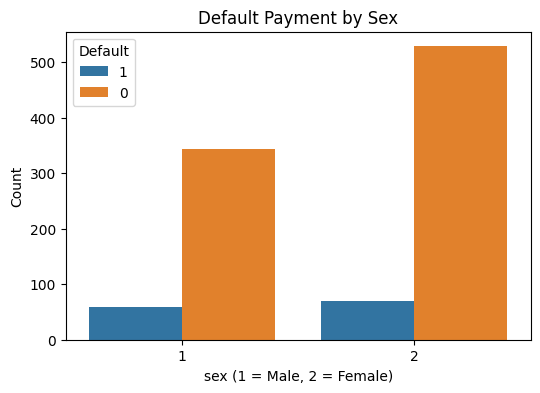

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='default_payment_next_month', data=df)
plt.title("Default Payment by Sex")
plt.xlabel("sex (1 = Male, 2 = Female)")
plt.ylabel("Count")
plt.legend(title='Default')
plt.show()


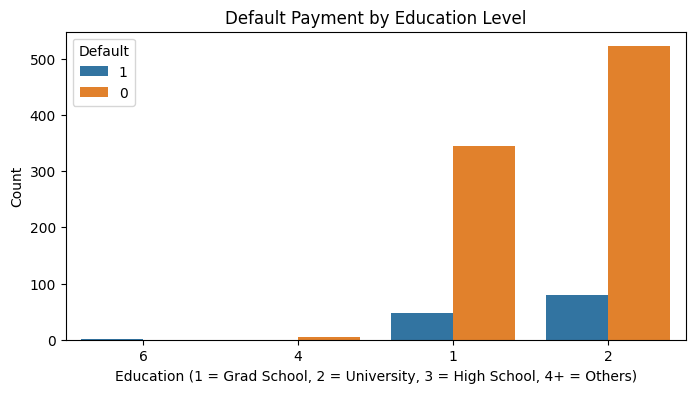

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x='education_level', hue='default_payment_next_month', data=df)
plt.title("Default Payment by Education Level")
plt.xlabel("Education (1 = Grad School, 2 = University, 3 = High School, 4+ = Others)")
plt.ylabel("Count")
plt.legend(title='Default')
plt.show()


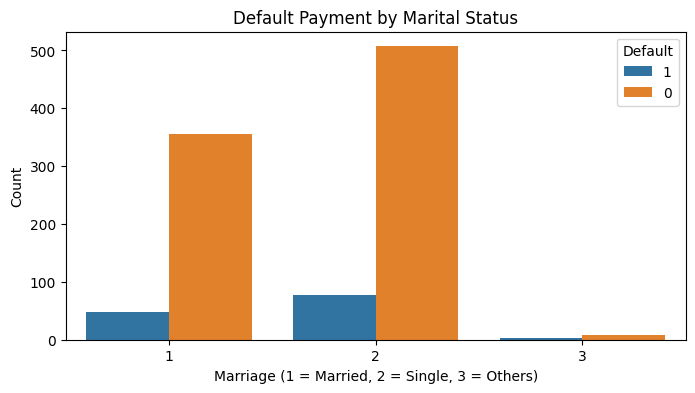

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='marital_status', hue='default_payment_next_month', data=df)
plt.title("Default Payment by Marital Status")
plt.xlabel("Marriage (1 = Married, 2 = Single, 3 = Others)")
plt.ylabel("Count")
plt.legend(title='Default')
plt.show()


In [17]:
import numpy as np
import pandas as pd

# Function to clean values
def clean_binary_column(val):
    # Handle lists/arrays with a single item
    if isinstance(val, (list, np.ndarray)) and len(val) == 1:
        val = val[0]
    elif isinstance(val, dict) and 'value' in val:
        val = val['value']
    # Try converting to numeric
    try:
        return int(float(val))
    except (ValueError, TypeError):
        return np.nan

# Apply cleaning
df['default_payment_next_month'] = df['default_payment_next_month'].apply(clean_binary_column)
df['default_payment_next_month'] = pd.to_numeric(df['default_payment_next_month'], errors='coerce')

# Drop invalid values and cast to int
df = df.dropna(subset=['default_payment_next_month'])
df['default_payment_next_month'] = df['default_payment_next_month'].astype(int)

# Confirm it worked
print(df['default_payment_next_month'].unique())
print(df['default_payment_next_month'].dtype)


[1 0]
int64


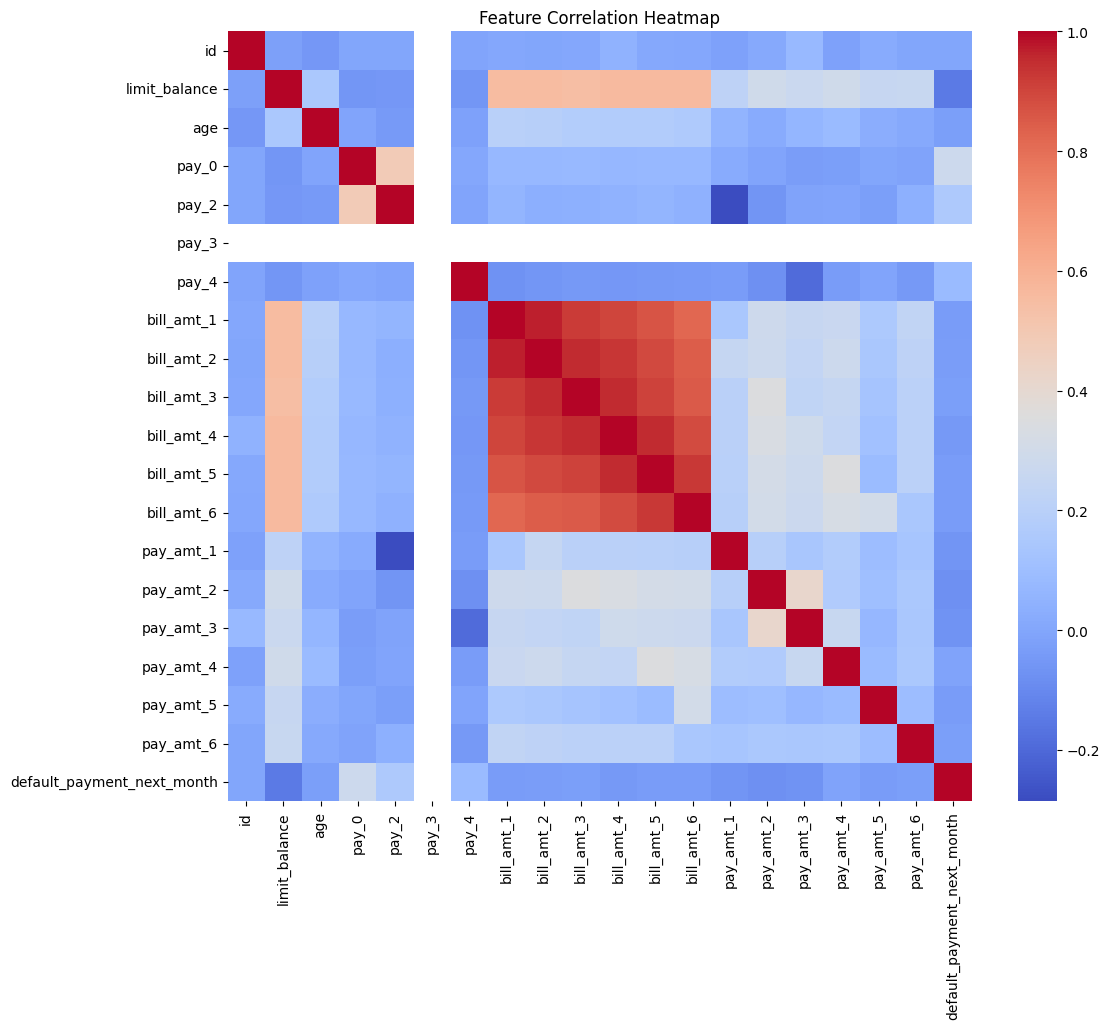


Correlation with 'default_payment_next_month':
default_payment_next_month    1.000000
pay_0                         0.279890
pay_2                         0.156188
pay_4                         0.081101
id                           -0.002428
pay_amt_4                    -0.010167
bill_amt_3                   -0.027464
age                          -0.028439
pay_amt_6                    -0.029094
bill_amt_2                   -0.032781
pay_amt_5                    -0.035268
bill_amt_1                   -0.037208
bill_amt_6                   -0.038011
bill_amt_5                   -0.039470
bill_amt_4                   -0.045275
pay_amt_1                    -0.063511
pay_amt_3                    -0.065792
pay_amt_2                    -0.079908
limit_balance                -0.150130
pay_3                              NaN
Name: default_payment_next_month, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: create a clean copy of numeric features
df_numeric = df.select_dtypes(include=[np.number])

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Correlation with target variable
correlation = df_numeric.corr()['default_payment_next_month'].sort_values(ascending=False)
print("\nCorrelation with 'default_payment_next_month':")
print(correlation)

#correlation is best suited for categorical variables
#when there is no correlation btw variables the value is 0 and when there is high correlation its -1 or 1
#negative correlation ex. the higher you go the cooler it becomes
#multicollinearity


In [19]:

#Classification model using XG boost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

# Rename target if needed
df.rename(columns={"default_payment_next_month": "default"}, inplace=True)
# Rename target if needed
df.rename(columns={"default_payment_next_month": "default"}, inplace=True)

# Drop ID column if present
if 'ID' in df.columns:
    df.drop(columns=["ID"], inplace=True)

# Handle missing values (if any)
df.dropna(inplace=True)
df.info()

# Features and target
X = df.drop("default", axis=1)
y = df["default"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)
#sklearn.pipeline
# accuracy, precision, recall
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    1000 non-null   float64
 1   limit_balance                         1000 non-null   float64
 2   sex                                   1000 non-null   object 
 3   education_level                       1000 non-null   object 
 4   marital_status                        1000 non-null   object 
 5   age                                   1000 non-null   float64
 6   pay_0                                 1000 non-null   float64
 7   pay_2                                 1000 non-null   float64
 8   pay_3                                 1000 non-null   float64
 9   pay_4                                 1000 non-null   float64
 10  pay_5                                 1000 non-null   object 
 11  pay_6             

ValueError: setting an array element with a sequence.